# ws 06 IBM stock

download - https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru/data?select=IBM_2006-01-01_to_2018-01-01.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout #

In [2]:
df = pd.read_csv('./datasets/IBM_2006-01-01_to_2018-01-01.csv',index_col='Date')
df.index = pd.to_datetime(df.index)

df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [3]:
df.isnull().sum()

Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64

In [4]:
df = df.Close

df.head()


Date
2006-01-03    82.06
2006-01-04    81.95
2006-01-05    82.50
2006-01-06    84.95
2006-01-09    83.73
Name: Close, dtype: float64

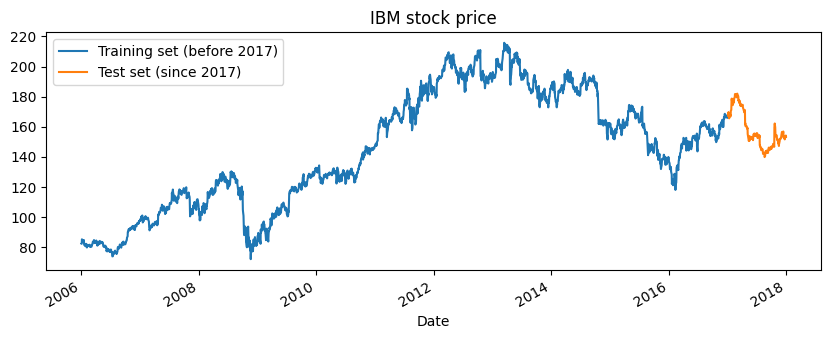

In [5]:
df[:'2016'].plot(figsize=(10, 3.5),legend=True) 
df['2017':].plot(figsize=(10, 3.5),legend=True)
plt.legend(['Training set (before 2017)','Test set (since 2017)'])
plt.title('IBM stock price')

plt.show()

In [6]:
print('Samples:', df.shape)
print('Train set:', df[:'2016'].shape)

Samples: (3020,)
Train set: (2769,)


In [7]:
from sklearn.preprocessing import MinMaxScaler

data = df.values.reshape(-1, 1)
sc = MinMaxScaler()
data_sc = sc.fit_transform(data)
data_sc[:5]

array([[0.07163682],
       [0.07087325],
       [0.0746911 ],
       [0.0916979 ],
       [0.08322921]])

In [8]:
def convertToMatrix(data, step=1):
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [9]:
n_train = 2769

train, test = data_sc[0:n_train], data_sc[n_train:]
train.shape, test.shape

((2769, 1), (251, 1))

In [10]:
step = 60 

X_train, y_train = convertToMatrix(train, step)  
X_test, y_test = convertToMatrix(test, step)

print('X Train, Test (after conversion):', X_train.shape, X_test.shape)
print('y Train, Test (after conversion):', y_train.shape, y_test.shape)

X Train, Test (after conversion): (2709, 60, 1) (191, 60, 1)
y Train, Test (after conversion): (2709, 1) (191, 1)


### Model

In [11]:
model = Sequential()

# model.add(LSTM(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
# model.add(Dropout(0.2))
# model.add(LSTM(units=40, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))  # output

# GRU
model.add(GRU(units=50, return_sequences=True, input_shape=(step, 1), activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(units=40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 40)             │        11,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,031 (74.34 KB)

 Trainable params: 19,031 (74.34 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0672
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0078
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0059
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0057
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0053
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0047
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0042
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0045
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0038
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0040
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0039
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0036
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0032
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0034
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0031
Epoc

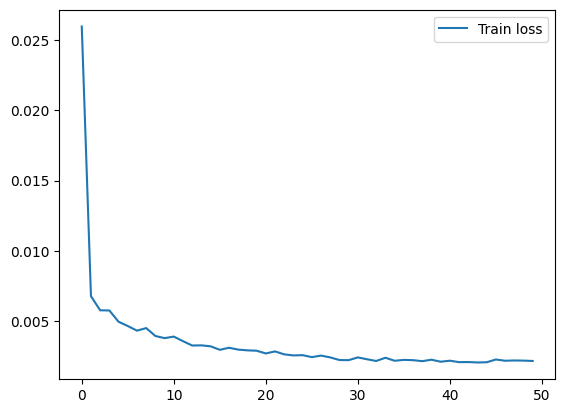

In [13]:
plt.plot(history.history['loss'], label='Train loss')
plt.legend()
plt.show()

In [14]:
testPredict = model.predict(X_test) 

testPredict.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


(191, 1)

In [15]:
y_test.shape

(191, 1)

In [16]:
print(y_train.shape)
sc.inverse_transform(y_train.reshape(-1,1))[:5]

(2709, 1)


array([[83.2 ],
       [82.47],
       [83.06],
       [83.45],
       [84.17]])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

testPredict_inv = sc.inverse_transform(testPredict)

y_test_inv = sc.inverse_transform(y_test)

r2_test = r2_score(y_test_inv, testPredict_inv) #

rmse_test = np.sqrt(mean_squared_error(y_test_inv, testPredict_inv))

print('R2 Test: {:.3f}'. format(r2_test))
print('RMSE Test: {:.3f}'. format(rmse_test))

R2 Test: 0.910
RMSE Test: 2.229


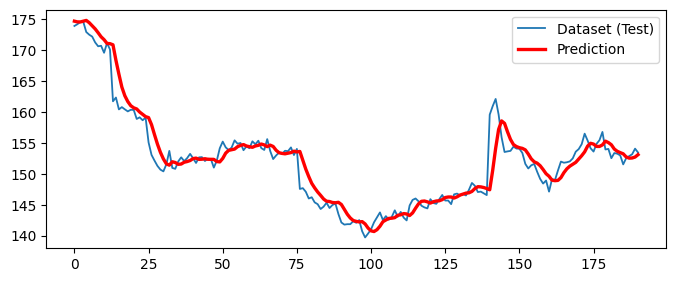

In [18]:
plt.figure(figsize=(12-4,3.1))

plt.plot(y_test_inv, lw=1.3, label='Dataset (Test)')

plt.plot(testPredict_inv, 'r', lw=2.4, label='Prediction')
plt.legend()
plt.show()